In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import csv
from scipy import stats
from config1 import api_key

In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

query_url = f"{url}appid={api_key}&units={units}&q="

In [106]:
cities = ["Paris", "London", "Rome", "Hong Kong", "Bangkok", "New Orleans", "Merida", "Perth", "Manilla", "Lima", "Buenos Aires", "Jakarta"]

lat = []
temp = []
humid = []
clouds = []
wind = []

for city in cities:
    print(f"Currently processing {city} and pulling all weather data.")
    response = requests.get(query_url + city).json()
    lat.append(response["coord"]["lat"])
    temp.append(response["main"]["temp"])
    humid.append(response["main"]["humidity"])
    clouds.append(response["clouds"]["all"])
    wind.append(response["wind"]["speed"])

Currently processing Paris and pulling all weather data.
Currently processing London and pulling all weather data.
Currently processing Rome and pulling all weather data.
Currently processing Hong Kong and pulling all weather data.
Currently processing Bangkok and pulling all weather data.
Currently processing New Orleans and pulling all weather data.
Currently processing Merida and pulling all weather data.
Currently processing Perth and pulling all weather data.
Currently processing Manilla and pulling all weather data.
Currently processing Lima and pulling all weather data.
Currently processing Buenos Aires and pulling all weather data.
Currently processing Jakarta and pulling all weather data.


In [107]:
responses_dict = {
    "city": cities,
    "lat": lat,
    "temp": temp,
    "humidity": humid,
    "clouds": clouds,
    "wind": wind
}

weather_data = pd.DataFrame(responses_dict)
weather_data

,city,lat,temp,humidity,clouds,wind
0,Paris,48.85,45.01,75,90,18.34
1,London,51.51,46.26,45,40,17.22
2,Rome,34.26,47.95,100,90,4.70
3,Hong Kong,22.29,66.70,72,40,23.04
4,Bangkok,13.75,83.55,83,20,10.29
5,New Orleans,29.95,73.69,69,90,13.87
6,Merida,20.97,83.66,54,40,18.34
7,Perth,-31.93,71.94,37,0,9.17
8,Manilla,14.60,79.27,69,20,9.17
9,Lima,-12.04,82.40,65,12,13.87


In [108]:
x_axis = weather_data["lat"]
y_axis_1 = weather_data["temp"]
y_axis_2 = weather_data["humidity"]
y_axis_3 = weather_data["clouds"]
y_axis_4 = weather_data["wind"]

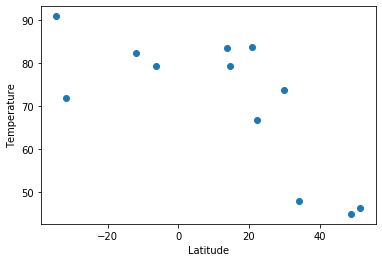

Write a sentence or two explaining what the code is and analyzing.


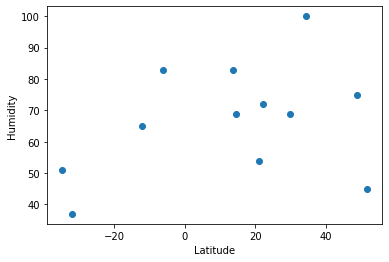

Write a sentence or two explaining what the code is and analyzing.


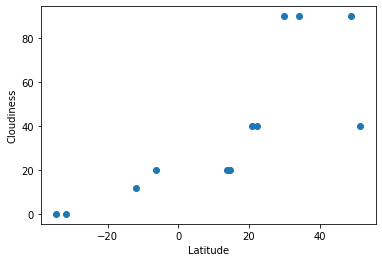

Write a sentence or two explaining what the code is and analyzing.


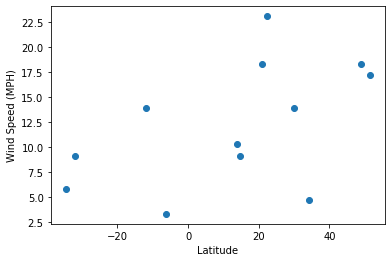

Write a sentence or two explaining what the code is and analyzing.


In [109]:
plt.scatter(x_axis, y_axis_1)
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.savefig("Images/Temp_Scatter_Plot")
plt.show()

print(f"Write a sentence or two explaining what the code is and analyzing.")

plt.scatter(x_axis, y_axis_2)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig("Images/Humid_Scatter_Plot")
plt.show()

print(f"Write a sentence or two explaining what the code is and analyzing.")

plt.scatter(x_axis, y_axis_3)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig("Images/Cloudiness_Scatter_Plot")
plt.show()

print(f"Write a sentence or two explaining what the code is and analyzing.")

plt.scatter(x_axis, y_axis_4)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.savefig("Images/Wind_Scatter_Plot")
plt.show()

print(f"Write a sentence or two explaining what the code is and analyzing.")

In [110]:
north = []
south = []
north_index = []
south_index = []
north_temps = []
north_humid = []
north_clouds = []
north_wind = []
south_temps = []
south_humid = []
south_clouds = []
south_wind = []

for value in lat:
    if value > 0:
        north.append(value)
        north_index.append(lat.index(value))
    else:
        south.append(value)
        south_index.append(lat.index(value))

for value in north_index:
    north_temps.append(temp[value])
    north_humid.append(humid[value])
    north_clouds.append(clouds[value])
    north_wind.append(wind[value])

for value in south_index:
    south_temps.append(temp[value])
    south_humid.append(humid[value])
    south_clouds.append(clouds[value])
    south_wind.append(wind[value])

In [111]:
north_dict = {
    "lat": north,
    "temp": north_temps,
    "humidity": north_humid,
    "cloudiness": north_clouds,
    "wind": north_wind
}

south_dict = {
    "lat": south,
    "temp": south_temps,
    "humidity": south_humid,
    "cloudiness": south_clouds,
    "wind": south_wind
}

north_df = pd.DataFrame(north_dict)
south_df = pd.DataFrame(south_dict)

north_x_axis = north_df["lat"]
north_y_1 = north_df["temp"]
north_y_2 = north_df["humidity"]
north_y_3 = north_df["cloudiness"]
north_y_4 = north_df["wind"]

south_x_axis = south_df["lat"]
south_y_1 = south_df["temp"]
south_y_2 = south_df["humidity"]
south_y_3 = south_df["cloudiness"]
south_y_4 = south_df["wind"]

weather_data.to_csv("Weather_Data_Export.csv", index=False, header=True)
north_df.to_csv("Northern_Weather_Data.csv", index=False, header=True)
south_df.to_csv("Southern_Weather_Data.csv", index=False, header=True)

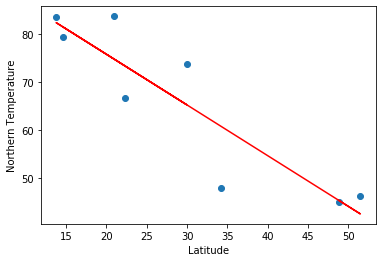

A short analysis


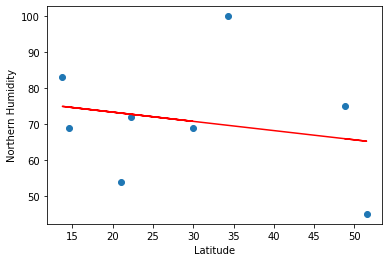

A short analysis


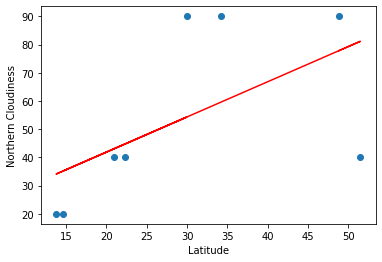

A short analysis


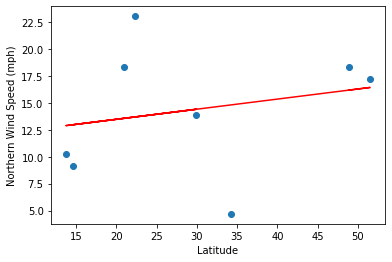

A short analysis


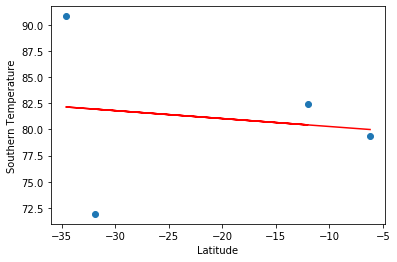

A short analysis


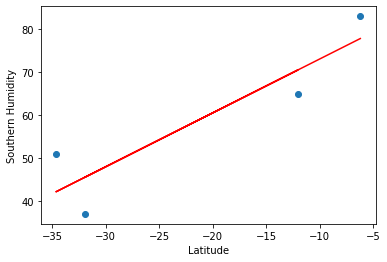

A short analysis


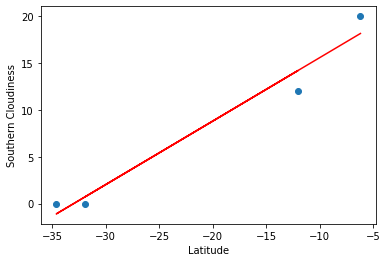

A short analysis


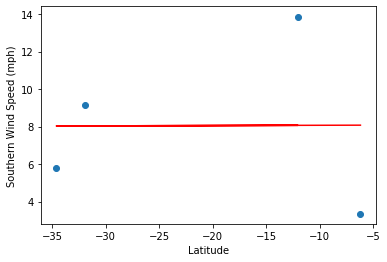

A short analysis


In [112]:
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(north_x_axis, north_y_1)
regress_values_1 = north_x_axis * slope + intercept
plt.scatter(north_x_axis, north_y_1)
plt.plot(north_x_axis,regress_values_1, "r-")
plt.xlabel("Latitude")
plt.ylabel("Northern Temperature")
plt.savefig("Images/North_Temp_Linear_Regression")
plt.show()

print("A short analysis")

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(north_x_axis, north_y_2)
regress_values_1 = north_x_axis * slope + intercept
plt.scatter(north_x_axis, north_y_2)
plt.plot(north_x_axis,regress_values_1, "r-")
plt.xlabel("Latitude")
plt.ylabel("Northern Humidity")
plt.savefig("Images/North_Humid_Linear_Regression")
plt.show()

print("A short analysis")

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(north_x_axis, north_y_3)
regress_values_1 = north_x_axis * slope + intercept
plt.scatter(north_x_axis, north_y_3)
plt.plot(north_x_axis,regress_values_1, "r-")
plt.xlabel("Latitude")
plt.ylabel("Northern Cloudiness")
plt.savefig("Images/North_Clouds_Linear_Regression")
plt.show()

print("A short analysis")

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(north_x_axis, north_y_4)
regress_values_1 = north_x_axis * slope + intercept
plt.scatter(north_x_axis, north_y_4)
plt.plot(north_x_axis,regress_values_1, "r-")
plt.xlabel("Latitude")
plt.ylabel("Northern Wind Speed (mph)")
plt.savefig("Images/North_Wind_Linear_Regression")
plt.show()

print("A short analysis")

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(south_x_axis, south_y_1)
regress_values_1 = south_x_axis * slope + intercept
plt.scatter(south_x_axis, south_y_1)
plt.plot(south_x_axis,regress_values_1, "r-")
plt.xlabel("Latitude")
plt.ylabel("Southern Temperature")
plt.savefig("Images/South_Temp_Linear_Regression")
plt.show()

print("A short analysis")

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(south_x_axis, south_y_2)
regress_values_1 = south_x_axis * slope + intercept
plt.scatter(south_x_axis, south_y_2)
plt.plot(south_x_axis,regress_values_1, "r-")
plt.xlabel("Latitude")
plt.ylabel("Southern Humidity")
plt.savefig("Images/South_Humid_Linear_Regression")
plt.show()

print("A short analysis")

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(south_x_axis, south_y_3)
regress_values_1 = south_x_axis * slope + intercept
plt.scatter(south_x_axis, south_y_3)
plt.plot(south_x_axis,regress_values_1, "r-")
plt.xlabel("Latitude")
plt.ylabel("Southern Cloudiness")
plt.savefig("Images/South_Clouds_Linear_Regression")
plt.show()

print("A short analysis")

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(south_x_axis, south_y_4)
regress_values_1 = south_x_axis * slope + intercept
plt.scatter(south_x_axis, south_y_4)
plt.plot(south_x_axis,regress_values_1, "r-")
plt.xlabel("Latitude")
plt.ylabel("Southern Wind Speed (mph)")
plt.savefig("Images/South_Wind_Linear_Regression")
plt.show()

print("A short analysis")